## Training a Classifier Model

In this notebook we will use our dataset to train and evaluate a classifier model.

You should have your dataframe in the format [Features] + [Target], where each row corresponds to a single observation and each column to either one of your extracted features or the biinary target you are trying to predict. If your data is not in this form, please revisit the notebook, `Feature Extraction.ipynb`

### 1. Get Data

In this notebook we use the existing, iris dataset, available as part of the `sklearn` package. You might want to begin with your personal dataset, which should be in an identical format.

In [33]:
from sklearn import datasets

iris = datasets.load_iris()

Let's plot some of the data

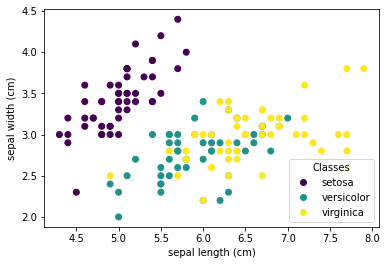

In [35]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types.

Let's create a dataframe from the iris data arrays

In [36]:
import pandas as pd

In [37]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['iris type'] = iris['target']

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x157638310>,
 'caps': [<matplotlib.lines.Line2D at 0x157638ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1576fafd0>,
 'medians': [<matplotlib.lines.Line2D at 0x157896510>,
 'fliers': [<matplotlib.lines.Line2D at 0x1577392d0>,
 'means': []}

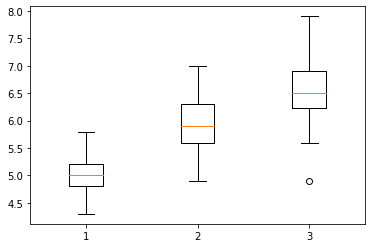

In [40]:
feature = 'sepal length (cm)'
vals0 = df[df['iris type']==0][feature].values
vals1 = df[df['iris type']==1][feature].values
vals2 = df[df['iris type']==2][feature].values

plt.boxplot(np.array(list(zip(vals0,vals1,vals2))))

{'whiskers': [<matplotlib.lines.Line2D at 0x157a87dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x157a87e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x157a45510>,
 'medians': [<matplotlib.lines.Line2D at 0x157ab3650>,
 'fliers': [<matplotlib.lines.Line2D at 0x157ab31d0>,
 'means': []}

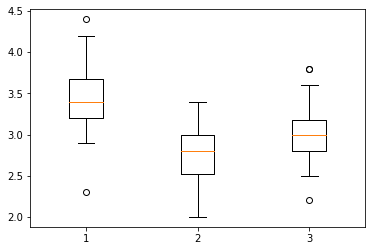

In [41]:
feature = 'sepal width (cm)'
vals0 = df[df['iris type']==0][feature].values
vals1 = df[df['iris type']==1][feature].values
vals2 = df[df['iris type']==2][feature].values

plt.boxplot(np.array(list(zip(vals0,vals1,vals2))))

In [42]:
import scipy
scipy.stats.ttest_ind(vals0,vals1)

Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)

In [43]:
scipy.stats.pointbiserialr(df['sepal length (cm)'], df['iris type'])

PointbiserialrResult(correlation=0.7825612318100813, pvalue=2.8904783526141205e-32)

We need to convert our target into a binary variable, if your data is not in that format, `pd.get_dummies` might help.

In [44]:
df = pd.get_dummies(df, columns=['iris type'])

In [45]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type_0,iris type_1,iris type_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 2. Get Training Data

It is common to extract feature and target names to a list or string, this makes it easier to remove/add features or change target in future

In [46]:
features = ['sepal length (cm)' ,'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target = 'iris type_0'

Let's isolate our feature and target data

In [47]:
X = df[features].values
y = df[target].values

We want to reserve some of our data for evaluation. Split your dataset into train/holdout sets, `sklearn.model_selection.train_test_split` might be useful here.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
len(X_train)

100

### 3. Train a Model

Models from different packages are likely to have slightly different interfaces. Here we will work with `sklearn`, which contains implementations for all of the most common non-neural network ML models.

Import your model and initialise it with your desired parameters.

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
clf = GradientBoostingClassifier()

Fit the model on the **training** data.

In [53]:
clf.fit(X_train, y_train)

GradientBoostingClassifier()

This model uses the default hyperparameters. We may wish to try multiple parameter sets. We can use k-fold cross validation and gridsearch to do this using `sklearn.model_selection.GridSearchCV`, which wraps a `sklearn` classifier in a gridsearch class that allows us to train multiple models at once wiith varying parameter values.

In [54]:
clf = GradientBoostingClassifier()

In [55]:
params = {
    'n_estimators':[10,50,100],
    'learning_rate':[0.001,0.01,0.1,1],
    'max_depth':[2, 4, 8],
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
gs = GridSearchCV(clf, param_grid=params, scoring='f1', cv=2)

In [58]:
gs.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 4, 8],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')

GridSearchCV has trained a model for every permutation of parameters specified in your param_grid. The model that performed best as per your `scoring` metric is available at `gs.best_estimator_`

In [59]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=50)

In [60]:
best_clf = gs.best_estimator_

The full results for each parameter set an be found in `gs.cv_results_`

In [61]:
gs.cv_results_

{'mean_fit_time': array([0.00547338, 0.02085137, 0.0319674 , 0.00381744, 0.01734602,
        0.0349896 , 0.00403011, 0.01878095, 0.03648841, 0.00325358,
        0.01458263, 0.03243244, 0.00428605, 0.01841152, 0.03310013,
        0.00393307, 0.01847816, 0.03576291, 0.00339806, 0.01438117,
        0.03128314, 0.00464106, 0.01717603, 0.03259254, 0.00405407,
        0.01890934, 0.04143   , 0.00330901, 0.01413906, 0.02796364,
        0.00381494, 0.02029443, 0.03435099, 0.00393701, 0.01663351,
        0.0330925 ]),
 'std_fit_time': array([8.82387161e-04, 1.35755539e-03, 2.45451927e-03, 1.44600868e-04,
        1.92046165e-04, 2.05540657e-03, 2.29954720e-04, 6.58988953e-04,
        3.60608101e-04, 6.35385513e-05, 1.12771988e-04, 1.85358524e-03,
        3.30924988e-04, 5.21540642e-04, 1.58071518e-04, 3.57985497e-04,
        3.88145447e-04, 2.92897224e-04, 3.39746475e-05, 1.13010406e-04,
        2.47311592e-03, 3.27825546e-04, 1.17695332e-03, 1.29461288e-04,
        2.15053558e-04, 3.70383263e-0

In [62]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005473,0.000882,0.001283,6.151199e-05,0.001,2,10,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.0,0.0,0.0,0.0,25
1,0.020851,0.001358,0.001212,4.160404e-05,0.001,2,50,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.0,0.0,0.0,0.0,25
2,0.031967,0.002455,0.001040,1.115799e-04,0.001,2,100,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.0,0.0,0.0,0.0,25
3,0.003817,0.000145,0.000877,1.549721e-06,0.001,4,10,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",0.0,0.0,0.0,0.0,25
4,0.017346,0.000192,0.000908,2.741814e-06,0.001,4,50,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",0.0,0.0,0.0,0.0,25
5,0.034990,0.002055,0.000997,3.588200e-05,0.001,4,100,"{'learning_rate': 0.001, 'max_depth': 4, 'n_es...",0.0,0.0,0.0,0.0,25
6,0.004030,0.000230,0.000873,2.944469e-05,0.001,8,10,"{'learning_rate': 0.001, 'max_depth': 8, 'n_es...",0.0,0.0,0.0,0.0,25
7,0.018781,0.000659,0.000949,4.160404e-05,0.001,8,50,"{'learning_rate': 0.001, 'max_depth': 8, 'n_es...",0.0,0.0,0.0,0.0,25
8,0.036488,0.000361,0.001028,6.914139e-06,0.001,8,100,"{'learning_rate': 0.001, 'max_depth': 8, 'n_es...",0.0,0.0,0.0,0.0,25
9,0.003254,0.000064,0.000867,1.251698e-05,0.010,2,10,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.0,0.0,0.0,0.0,25


In [63]:
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}

In [64]:
gs.best_score_

1.0

### 4. Evaluate Model

Now that we have trained our model and selected the best parameters on our training set, we want to know how it performs on unseen data, i.e. our test set!

We can take our best model and use it's predict method on our `X_test`.

In [65]:
best_clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=uint8)

In [66]:
y_pred = best_clf.predict(X_test)

For this data we have the ground truth in `y_test`.

In [67]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=uint8)

We can compare our predictions to our ground truth using standard classification evaluation metrics. A full guide to these metrisc can be found here - https://scikit-learn.org/stable/modules/model_evaluation.html.

In our hyperparameter search we optimized using `f1_score`. Let's compute `f1_score` on our test set.

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(y_pred, y_test)

1.0

### 5. Train Multiple Models

Using exactly the same code from before, we cna train a model on our other targets. Change the target variable and train a model for each unique target and evaluate on test.

In [70]:
targets = ['iris type_0', 'iris type_1', 'iris type_2']

In [73]:
models = {}
for t in targets:
    X = df[features].values
    y = df[target].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    clf = GradientBoostingClassifier()
    
    gs = GridSearchCV(clf, param_grid=params, scoring='f1', cv=2)
    gs.fit(X_train, y_train)
    
    best = gs.best_estimator_
    
    y_pred = best.predict(X_test)
    
    f1 = f1_score(y_pred, y_test)
    print(f'Test f1 for target {t}: {f1}')

Test f1 for target iris type_0: 1.0
Test f1 for target iris type_1: 1.0
Test f1 for target iris type_2: 1.0


Confusion matrices can help understand the models predictions in greater detail. Can you create one for your latest results?`sklearn.metrics.confusion_matrix` might be useful here.

In [74]:
from sklearn.metrics import confusion_matrix

In [80]:
C = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Ground Truth')

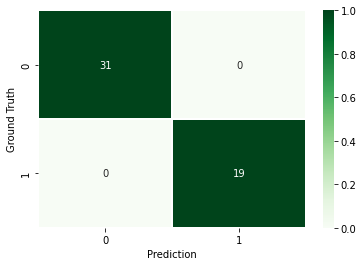

In [81]:
import seaborn as sns

plt.close('all')
ax = sns.heatmap(C, linewidth=0.5, vmin=0, vmax=1, cmap='Greens', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')